In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [18]:
trump_tweets = pd.read_csv('tweets/trump.csv')

print(trump_tweets.shape)
trump_tweets.head(10)

(3591, 7)


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Will be interviewed at the Border by @seanhann...,01-11-2019 01:45:54,11518,67631,False,1083540470570143750
1,Twitter for iPhone,Dear Diary... https://t.co/NAuMaQW6fl,01-11-2019 01:10:49,45849,177910,False,1083531644785455104
2,Twitter for iPhone,From the Southern Border.... https://t.co/Vgsf...,01-10-2019 22:41:01,33539,129711,False,1083493944527249408
3,Twitter for iPhone,RT @SenateGOP: Why do we need border security?...,01-10-2019 18:17:01,25555,0,True,1083427505736839168
4,Twitter for iPhone,Because of the Democrats intransigence on Bord...,01-10-2019 18:14:31,21503,95295,False,1083426878336036865
5,Twitter for iPhone,President Obama thank you for your great suppo...,01-10-2019 16:47:11,55042,173490,False,1083404900862545920
6,Twitter for iPhone,MAKE AMERICA GREAT AGAIN!,01-10-2019 13:43:54,42673,198515,False,1083358775925460992
7,Twitter for iPhone,Getting ready to leave for the Great State of ...,01-10-2019 13:43:15,15164,101829,False,1083358611315789826
8,Twitter for iPhone,“Great support for Border Security and the Wal...,01-10-2019 13:41:25,18519,90118,False,1083358150214979585
9,Twitter for iPhone,There is GREAT unity with the Republicans in t...,01-10-2019 13:34:10,18829,87119,False,1083356326833602561


In [19]:
bolso_tweets = pd.read_csv('tweets/bolsonaro.csv')

print(bolso_tweets.shape)
bolso_tweets.head(10)

(3274, 11)


,screen_name,created_at,text,retweet_count,favorite_count,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,jairbolsonaro,2019-11-01T00:30:19Z,"De volta ao Brasil, após viagem de negócios pe...",363,1975,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190063483779465219
1,jairbolsonaro,2019-10-31T21:31:36Z,"O @MInfraestrutura , junto com o @DNIToficial ...",314,1498,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190018506533814307
2,jairbolsonaro,2019-10-31T20:28:18Z,É uma enorme satisfação ver a alegria dessa mo...,93,563,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190002578521767936
3,jairbolsonaro,2019-10-31T19:00:44Z,"A Baia de Angra dos Reis pode ser a nossa ""Can...",313,1637,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189980543380836356
4,jairbolsonaro,2019-10-31T17:10:23Z,"Bahia: concessão da Ferrovia Oeste-Leste, trec...",140,738,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189952770088013824
5,jairbolsonaro,2019-10-31T11:52:19Z,RT @SF_Moro: Prosseguem os recordes de apreens...,6478,0,NaN,SF_Moro,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189872726091141121
6,jairbolsonaro,2019-10-30T22:57:59Z,@Pauloeuaqui Kkkkkk,1,29,Pauloeuaqui,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,NaN,1189677859176095744
7,jairbolsonaro,2019-10-30T22:53:23Z,Risco-Brasil chega a seu menor patamar desde 2...,1074,4714,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189676703204937729
8,jairbolsonaro,2019-10-30T20:12:46Z,E CONHECEREIS A VERDADE E A VERDADE VOS LIBERT...,1255,4409,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189636282227531776
9,jairbolsonaro,2019-10-30T18:13:02Z,"Seguimos ampliando as possibilidades, bem como...",126,727,jairbolsonaro,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189606148267229184


clean tweets

In [24]:
import string, re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from google_trans_new import google_translator

def clean(text, language):
    stop = set(stopwords.words(language))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    doc = re.sub(r'http\S+', '', text)
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

bolso_tweets_cleaned = []
bolso_tweets_cleaned_pt = []
translator =  google_translator()

trump_tweets_cleaned = []
for tweet in trump_tweets['text'].values:
    trump_tweets_cleaned.append(clean(tweet,'english'))

for tweet_pt in bolso_tweets['text'].values:
    tweet = translator.translate(tweet_pt, lang_tgt = 'en')
    bolso_tweets_cleaned.append(clean(tweet,'english'))
    bolso_tweets_cleaned_pt.append(clean(tweet_pt,'portuguese'))


bolso_tweets_cleaned[:3], bolso_tweets_cleaned_pt[:3]

google_new_transError: 429 (Too Many Requests) from TTS API. Probable cause: Unknown

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def print_clusters(cluster):
    i = 0
    label = ['purple', 'yellow', 'ciano', 'green']
    for c in cluster:
        print('Cluster no. '+str(i)+' - '+label[i] )
        print(', '.join(c))
        i = i + 1
        
def kmeans(documents):

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(documents)
    true_k = 4
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=5000, n_init=50 )
    model.fit(X)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    topics = []
    for i in range(true_k):
        t = []
        for ind in order_centroids[i, :10]:
            t.append(terms[ind])
        topics.append(t)
        
    pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ])          

    X = pipeline.fit_transform(documents).todense()        
    pca = PCA(n_components=50).fit(X)
    data2D = pca.transform(X)
    plt.figure(figsize=(20,14))
    plt.scatter(data2D[:,0], data2D[:,1],c=model.labels_, cmap='viridis')
    plt.show()
    print_clusters(topics)


Trump tweets - clustered


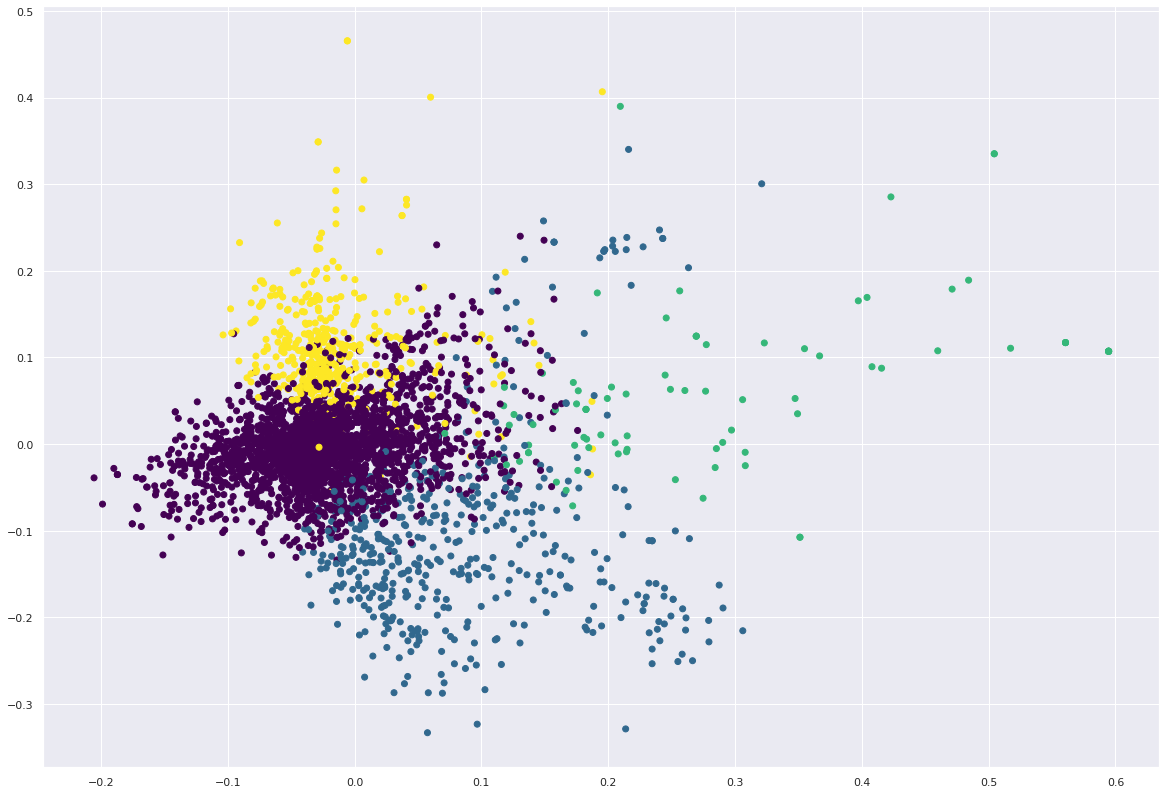

Cluster no. 0 - purple
great, people, president, amp, country, news, trump, year, thank, fake
Cluster no. 1 - yellow
border, vote, security, great, love, crime, wall, strong, military, democrat
Cluster no. 2 - ciano
america, again, great, make, making, together, first, business, winning, open
Cluster no. 3 - green
rt, realdonaldtrump, whitehouse, president, trump, scavino45, flotus, potus, erictrump, today


In [130]:
print('Trump tweets - clustered')
kmeans(trump_tweets_cleaned)


Bolsonaro tweets - clustered


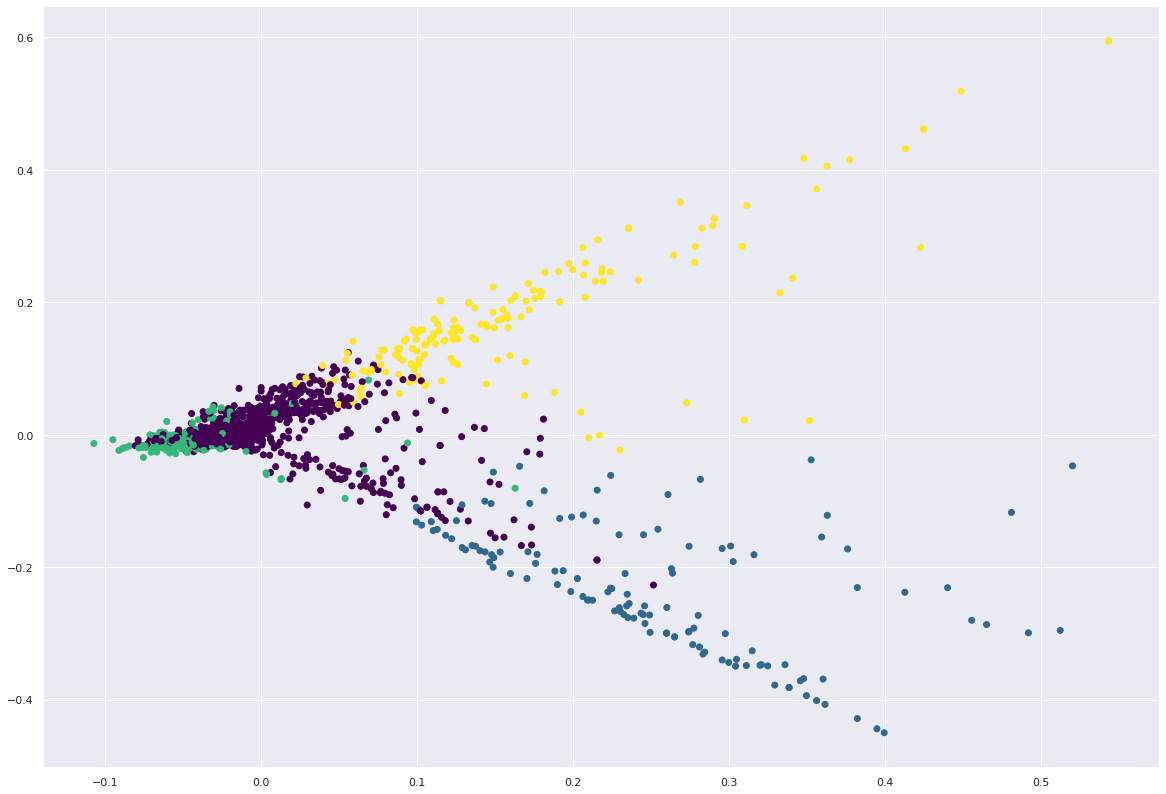

Cluster no. 0 - purple
brasil, rt, governo, obrigado, ano, vamos, hoje, país, sobre, economia
Cluster no. 1 - yellow
abraço, forte, obrigado, todos, consideração, hoje, brasil, deus, trabalho, lá
Cluster no. 2 - ciano
bolsonaro, jair, live, rt, presidente, youtube, semana, governo, sobre, quintafeira
Cluster no. 3 - green
todos, bom, boa, dia, noite, acima, brasil, grande, tudo, deus


In [131]:
print('\nBolsonaro tweets - clustered')
kmeans(bolso_tweets_cleaned)

hatesonar and sentiment analysis

In [139]:
import erasehate as eh
from textblob import TextBlob

def sentiment_analysis(docs, translate):
    erase_pred = []
    polarity = []

        
    for documents in docs:
        analysis_tb = TextBlob(documents)
        polarity.append(analysis_tb.sentiment.polarity)
    erase_pred.append(eh.classifier(docs).predict().raw_output)    
    return erase_pred, polarity

#use bolso translate = 1 for accuracy, but it takes some time
bolso_eh, bolso_polarity = sentiment_analysis(bolso_tweets_cleaned,1)
trump_eh, trump_polarity = sentiment_analysis(trump_tweets_cleaned,0)

****** Making Model Server Request *******
***** Response Received *******
****** Making Model Server Request *******
***** Response Received *******


In [140]:
def plot_polarity(polarity):
    plt.figure(figsize=(16,6))
    fig = sns.distplot(polarity)
    fig.set_title('polarity of tweets - trump')
    fig.set_ylabel('no. of tweets')
    fig.set_xlabel('polarity')

In [146]:
def plot_erasehate(erase_pred):
    hate = []
    offe = []
    neit = []

    prediction_array = erase_pred[0]['prediction_array']

    for i in prediction_array:
        hate.append(i[0])
        offe.append(i[1])
        neit.append(i[2])

    print('Trump tweets')
    fig, (ax1, ax2, ax3)  = plt.subplots(1,3, figsize=(16,6))
    sns.distplot(hate, ax=ax1)
    ax1.set_title('distribution of hate speech')
    ax1.set_ylabel('no. of tweets')
    ax1.set_xlabel('prob. of hate speech')
    sns.distplot(offe, ax=ax2)
    ax2.set_title('distribution of offensive speech')
    ax2.set_ylabel('no. of tweets')
    ax2.set_xlabel('prob. of offensive speech')
    sns.distplot(neit, ax=ax3)
    ax3.set_ylabel('no. of tweets')
    ax3.set_title('distribution of neutral speech')
    ax3.set_xlabel('prob. of neutral speech')

/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


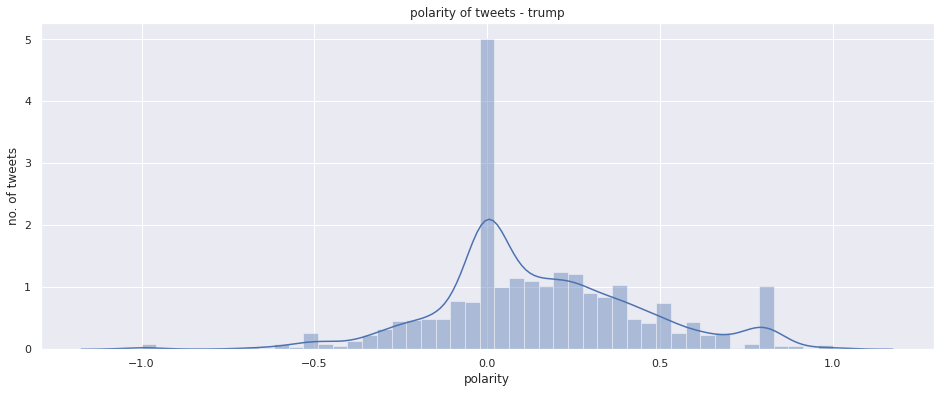

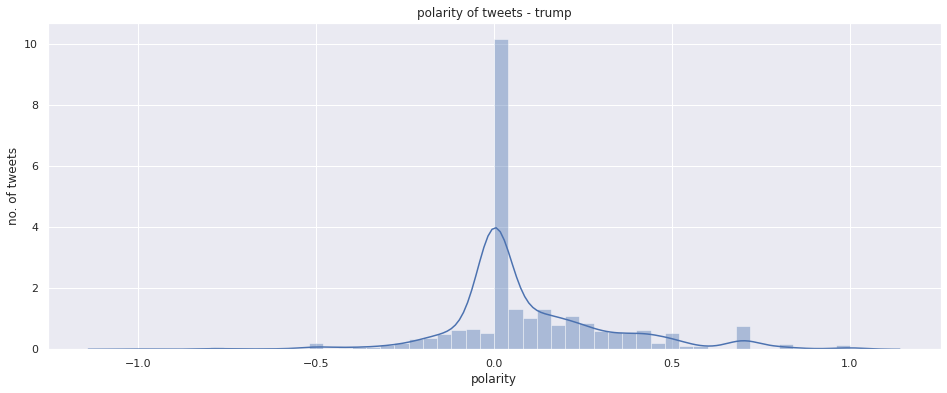

In [147]:
plot_polarity(trump_polarity)
plot_polarity(bolso_polarity)

Trump tweets
Trump tweets


/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

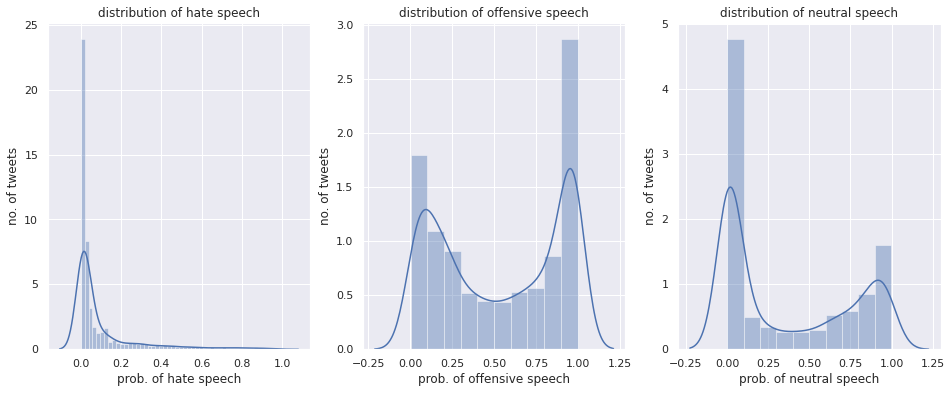

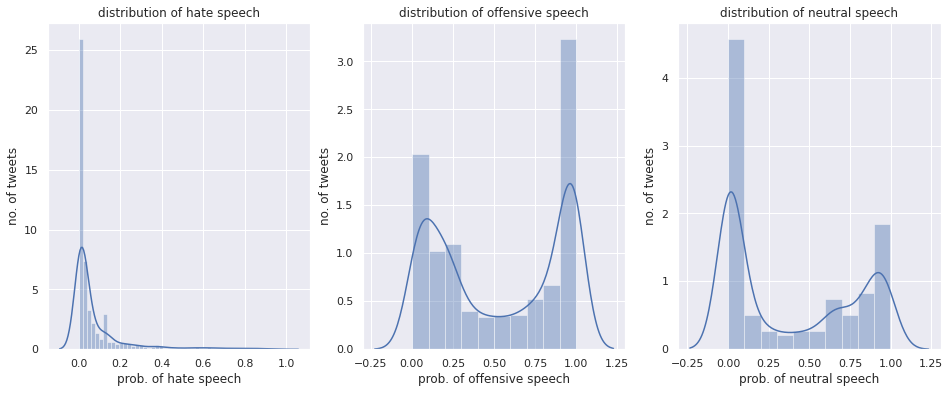

In [148]:
plot_erasehate(trump_sonar)
plot_erasehate(bolso_sonar)

[nltk_data] Downloading package wordnet to /home/ggapp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ggapp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [207]:
import spacy
from gensim import corpora
spacy.load('en_core_web_sm')
from spacy.lang.en import English
import gensim
import pyLDAvis.gensim


parser = English()


def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = []
    for t in text:
        t = tokenize(t)
        tokens.append(t)
    return tokens


def get_topics_lda(tweets):
    text_lda = prepare_text_for_lda(tweets)

    dictionary = corpora.Dictionary(text_lda)
    corpus = [dictionary.doc2bow(text) for text in text_lda]
    #corpus.append('')
    
    NUM_TOPICS = 5
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(topic)
    lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
    return lda_display

In [209]:
lda_display = get_topics_lda(trump_tweets_cleaned)
pyLDAvis.display(lda_display)

(0, '0.014*"people" + 0.013*"trade" + 0.012*"medium" + 0.010*"president"')
(1, '0.020*"trump" + 0.011*"president" + 0.010*"american" + 0.010*"history"')
(2, '0.030*"border" + 0.027*"great" + 0.019*"country" + 0.015*"democrat"')
(3, '0.034*"great" + 0.017*"thank" + 0.014*"honor" + 0.013*"today"')
(4, '0.017*"collusion" + 0.014*"democrat" + 0.013*"people" + 0.013*"witch"')


In [210]:
lda_display = get_topics_lda(bolso_tweets_cleaned)
pyLDAvis.display(lda_display)

(0, '0.020*"brasil" + 0.011*"governo" + 0.008*"bolsonaro" + 0.007*"todos"')
(1, '0.012*"abraço" + 0.010*"forte" + 0.009*"sobre" + 0.008*"brasil"')
(2, '0.009*"todos" + 0.009*"brasil" + 0.008*"bolsonaro" + 0.006*"mídia"')
(3, '0.012*"brasil" + 0.010*"obrigado" + 0.007*"todos" + 0.007*"abraço"')
(4, '0.018*"brasil" + 0.005*"vamos" + 0.005*"todos" + 0.004*"acima"')


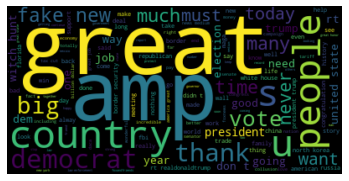

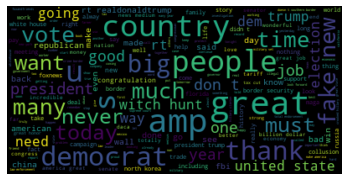

In [213]:
from wordcloud import WordCloud
def create_wordcloud(tweets):
    raw_tweets = " ".join(str(x) for x in tweets)
    wordcloud = WordCloud().generate(raw_tweets)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(raw_tweets)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()